$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$


# Recap on linear regression

Last class, we talked about how we could turn linear regression into a linear algebra problem
- You can calculate this yourself
- You can also do linear regression using statistical packages like statsmodel

Today we will discuss two ways of solving non-linear regression problems
- Turn a non-linear problem into a linear one and solve
- Non-linear curve fitting


## Turn a non-linear regression problem into a linear regression problem



-   Rate constants and reaction orders are determined by using models that are fit to experimental data
-   A common case is to monitor concentration vs. time in a constant volume, batch reactor
-   We consider the disappearance of $A$
-   From the mole balance we know:

\begin{equation}
\frac{dN_A}{dt} = r_A V
\end{equation}

-   Let us assume the rate law is of the form: $r_A = k C_A^\alpha$ and a constant volume so that:

\begin{equation}
\frac{dC_A}{dt} = -k C_A^\alpha
\end{equation}

-   Let us be loose with mathematics, rearrange the equation, and take the log of both sides.
    -   By loose I mean we take logs of quantities that are not dimensionless

\begin{equation}
\ln(-\frac{dC_A}{dt}) = \ln{k} + \alpha \ln C_A
\end{equation}

-   This suggests that if we could numerically compute $\frac{dC_A}{dt}$ from our data of $C_A(t)$ then a plot of the log of the negative derivative vs the log of concentration would have
    -   an intercept equal to the log of the rate constant, $k$
    -   and a slope equal to the reaction order $\alpha$

-   Given the following data, determine the reaction order in A and the rate constant with 95% confidence intervals.

<table id="orgfd5ae74" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">time (min)</th>
<th scope="col" class="org-right">C\_A (mol/L)</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-right">0</td>
<td class="org-right">0.0500</td>
</tr>


<tr>
<td class="org-right">50</td>
<td class="org-right">0.0380</td>
</tr>


<tr>
<td class="org-right">100</td>
<td class="org-right">0.0306</td>
</tr>


<tr>
<td class="org-right">150</td>
<td class="org-right">0.0256</td>
</tr>


<tr>
<td class="org-right">200</td>
<td class="org-right">0.0222</td>
</tr>


<tr>
<td class="org-right">250</td>
<td class="org-right">0.0195</td>
</tr>


<tr>
<td class="org-right">300</td>
<td class="org-right">0.0174</td>
</tr>
</tbody>
</table>


- We can get the derivatives by first fitting a spline through the data. The spline is essentially just a smoothing function  
-   We will use the `splev` function to numerically compute derivatives from spline fits of the function. 
-   This works best when the $x$ points are evenly spaced, and they should be monotically increasing or decreasing


Text(0, 0.5, 'Conc. [mol/L]')

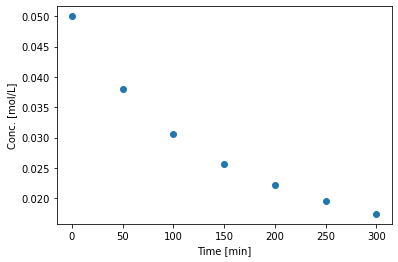

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data=np.array([[0,0.05],
               [50,.038],
               [100,.0306],
               [150,.0256],
               [200,.0222],
               [250,.0195],
               [300,.0174]])

plt.plot(data[:,0],data[:,1],'o')
plt.xlabel('Time [min]')
plt.ylabel('Conc. [mol/L]')

So, we need to convert the list of numbers to a numpy array so we can do the analysis.



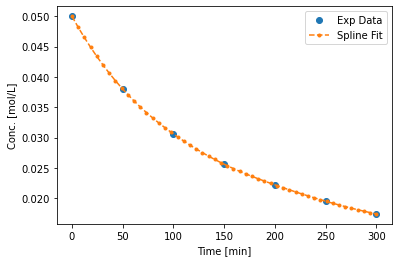

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]   # column 0
Ca = data[:, 1]  # column 1

# calculate a spline through the data
tck = interpolate.splrep(t, Ca)

t_eval = np.linspace(0,300)
Ca_spline = interpolate.splev(t_eval, tck)
plt.plot(data[:,0],data[:,1],'o', label='Exp Data')
plt.plot(t_eval, Ca_spline,'--.',label='Spline Fit')
plt.xlabel('Time [min]')
plt.ylabel('Conc. [mol/L]')
plt.legend()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


alpha = 2.0354816446001127, conf interval [1.92418422 2.14677907]
k = 0.1402128334966632, conf interval [0.09372748 0.20975319]


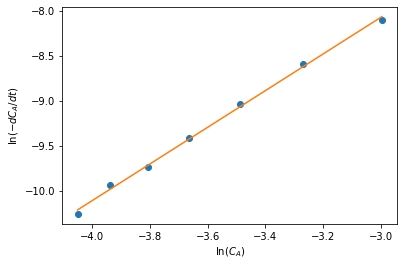

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import statsmodels.api as sm

# data will be a 2d list, which we convert to an array here
data = np.array(data)
t = data[:, 0]   # column 0
Ca = data[:, 1]  # column 1

# calculate numerical derivatives
tck = interpolate.splrep(t, Ca)
dCadt = interpolate.splev(t, tck, der=1)

# do the transformation
x = np.log(Ca)
y = np.log(-dCadt)

# setup and do the regression
# column of ones and x:  y = b + mx
X = np.column_stack([x, x**0])

mod = sm.OLS(y, X)
res = mod.fit()

intercept = res.params[1]
alpha = res.params[0]

confidence_intervals = res.conf_int(0.05)
intercept_error = confidence_intervals[1]
alpha_error = confidence_intervals[0]


print('alpha = {0}, conf interval {1}'.format(alpha, alpha_error))
print('k = {0}, conf interval {1}'.format(np.exp(intercept), 
                                          np.exp(intercept_error)))


# always visually inspect the fit
plt.plot(x, y,'o')
plt.plot(x, res.predict(X))
plt.xlabel('$\ln(C_A)$')
plt.ylabel('$\ln(-dC_A/dt)$')
plt.show()

In [ ]:
res.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2210.
Date:                Thu, 30 Apr 2020   Prob (F-statistic):           8.22e-08
Time:                        11:35:11   Log-Likelihood:                 13.785
No. Observations:                   7   AIC:                            -23.57
Df Residuals:                       5   BIC:                            -23.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0355      0.043     47.013      0.000       1.924       2.147
const         -1.9646      0.157    -12.539      0.000      -2.367      -1.562
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.377
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.735
Skew:                          -0.181   Prob(JB):                        0.692
Kurtosis:                       1.454   Cond. No.                         40.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


-   You can see there is a reasonably large range of values for the rate constant and reaction order (although the confidence interval does not contain zero)

-   The fit looks ok, but you can see the errors are not exactly random
    -   There seems to be systematic trends in a sigmoidal shape of the data
    -   That suggests small inadequacy in the model

-   Let us examine some methods of evaluating the quality of fit

-   First we examine the residuals, or the errors between the data and the model.

-   In a good fit, these will be randomly distributed

-   In a less good fit, there will be trends



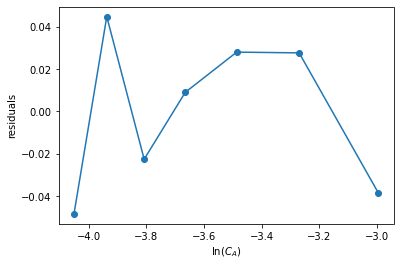

In [ ]:
residuals = y - res.predict(X)

# always visually inspect the fit
plt.plot(x, residuals, 'o-')
plt.xlabel('$\ln(C_A)$')
plt.ylabel('residuals')
plt.show()



-   You can see there are trends in this data
    -   That means the model may not be complete

-   There is uncertainty in the data
    -   In each concentration measurement there is uncertainty in the time and value of concentration
    -   You need more data to reduce the uncertainty
    -   You may also need better data to reduce the uncertainty

-   Derivatives tend to *magnify* errors in data
    -   The method we used to fit the data contributed to the uncertainty

-   We also *nonlinearly* transformed the errors by taking logs and exp of the data and results, which may have skewed the confidence limits




## Nonlinear regression



-   Nonlinear models are abundant in reaction engineering
    -   $r = k C_A^n $ is linear in the $k$ parameter, and nonlinear in $n$

-   Nonlinear fitting is essentially a non-linear optimization problem

-   Unlike linear regression, where we directly compute the parameters using matrix algebra, we have to provide an initial guess and iterate to the solution

-   Similar to using fsolve, we must define a function of the model
    -   The function takes an independent variable, and parameters, f(x,a,b,&#x2026;)
    -   The function should return a value of $y$ for every value of $x$
    -   i.e. it should be vectorized

-   It is possible to formulate these problems as nonlinear minimization of summed squared errors. See [this example](http://jkitchin.github.io/blog/2013/02/18/Nonlinear-curve-fitting/).

-   The function [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) provides nonlinear fitting of models (functions) to data. 


Let's say we want to fit some other data to the function $$y=ax/(b+x)$$




Text(0, 0.5, 'y')

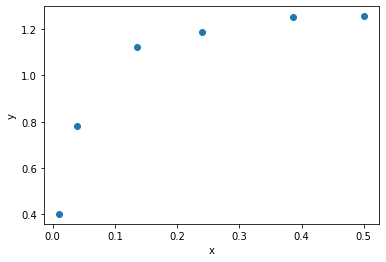

In [ ]:
import numpy as np

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])


plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

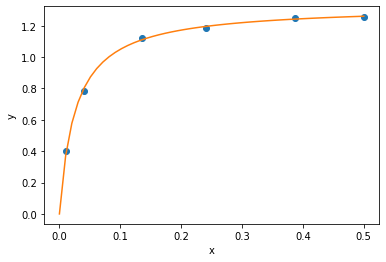

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

popt, pcov = curve_fit(func, x, y, p0=(3,3))


xrange = np.linspace(0,0.5)
fitted_y = func(xrange, *popt)

plt.plot(x,y,'o')
plt.plot(xrange,fitted_y)

plt.xlabel('x')
plt.ylabel('y')


In [ ]:
print(popt)

[1.32753142 0.02646156]


-   We also need to estimate uncertainties in nonlinear parameters

-   `lmfit` provides a nice way to do this

[lmfit](https://lmfit.github.io/lmfit-py/)

Read the [lmfit](https://lmfit.github.io/lmfit-py/) documentation to see how the confidence intervals are computed

Here is an example usage of lmfit.



In [ ]:
!pip install lmfit

     |████████████████████████████████| 292 kB 7.7 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84402 sha256=8328dc5ec51b17be5d13b3ab47d4b414f6a54deab3dd98f55708967677867dff
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17648 sha256=7d66fc626e5eeb588f3a81b94e0560796c7f9f0602982830b1c2e5983d01719d
  Stored in directory: /root/.cache/pip/wheels/4c/e9/f0/bc343d5b77d2fded45177f424a6b0b9224b92ff6e7c150bad4
Successfully built lmfit asteval


[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 6
    # variables        = 2
    chi-square         = 6.9885e-04
    reduced chi-square = 1.7471e-04
    Akaike info crit   = -50.3470350
    Bayesian info crit = -50.7635160
[[Variables]]
    a:  1.32753139 +/- 0.00972276 (0.73%) (init = 2)
    b:  0.02646155 +/- 0.00102789 (3.88%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = 0.711


Text(0, 0.5, 'y')

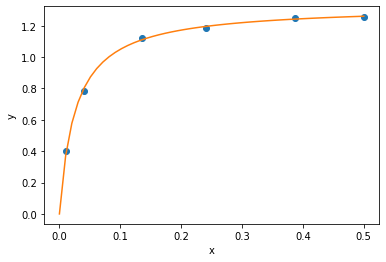

In [ ]:
from lmfit import Model

gmodel = Model(func, independent_vars=['x'],param_names=['a','b'])
params = gmodel.make_params(a=2., b=1.0)
result = gmodel.fit(y, params, x=x)

print(result.fit_report())
xrange = np.linspace(0,0.5)

fitted_y = result.eval(x=xrange)


plt.plot(x,y,'o')
plt.plot(xrange,fitted_y)

plt.xlabel('x')
plt.ylabel('y')

-   Here the two intervals are relatively small, and do not include zero, suggesting both parameters are significant.

-   More importantly, the errors are not skewed by a nonlinear transformation.

-   Note you have to provide an initial guess.
    -   This will not always be easy to guess.
    -   There may be more than one minimum in the fit also, so different guesses may give different parameters.

